# HW4: Occupation Dataset

### Introduction:

Special thanks to: https://github.com/guipsamora for sharing his datasets, materials, and questions.

- https://github.com/justmarkham for sharing the dataset and materials.


In [1]:
### Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### I believe the following data set is from the US in the 1950s.
### Gender proportions and ages are thus reflective of that era.
### Import the dataset from this address. https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user
### Assign it to a variable called users and use the 'user_id' as index
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', 
                      sep='|', index_col='user_id')

In [3]:
# Problem 1. See the first 10 entries. (done for you)
users.head(10)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


In [4]:
# Problem 2. How many observations and columns are in the data?
print("{0} Observations, {1} Columns".format(len(users.index), len(users.columns)))

943 Observations, 4 Columns


In [5]:
# Problem 3. How many different occupations there are in this dataset?
print(users['occupation'].nunique())

21


In [6]:
# Problem 4. What is the most frequent occupation?
print(users['occupation'].value_counts().head(1))

occupation
student    196
Name: count, dtype: int64


In [7]:
# Problem 5. Discover what is the mean age per occupation.
# Sort the results and find the 3 occupations with the lowest mean age and the 3 with the highest
mean_age = users.groupby('occupation')['age'].mean().sort_values()
print("Lowest:")
print(mean_age.head(3))
print("\nHighest:")
print(mean_age.tail(3))

Lowest:
occupation
student          22.081633
none             26.555556
entertainment    29.222222
Name: age, dtype: float64

Highest:
occupation
educator    42.010526
doctor      43.571429
retired     63.071429
Name: age, dtype: float64


In [8]:
# Problem 6. Find the proportion of males by occupation and sort it from the most to the least
male = users.copy()
male['male'] = male['gender'] == "M"
print(male.groupby('occupation')['male'].mean().sort_values(ascending = False))

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: male, dtype: float64


In [9]:
# Problem 7. For each occupation, calculate the minimum and maximum ages
# See groupby and agg() to perform multiple aggregate functions at once
print(users.groupby('occupation')['age'].agg(['min', 'max']))

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [10]:
# Problem 8. For each combination of occupation and gender, calculate the mean age.
# Arrange the results in a table so each row is an occupation, and you have a 
# column of the average male age and another column with the average female age.
# Sort the resulting table by Female mean age from least to greatest
print(users.pivot_table(index = 'occupation', values = 'age', columns = 'gender', aggfunc = 'mean').sort_values('F'))

gender                 F          M
occupation                         
student        20.750000  22.669118
salesman       27.000000  38.555556
scientist      28.333333  36.321429
engineer       29.500000  36.600000
artist         30.307692  32.333333
entertainment  31.000000  29.000000
programmer     32.166667  33.216667
homemaker      34.166667  23.000000
other          35.472222  34.028986
none           36.500000  18.600000
marketing      37.200000  37.875000
writer         37.631579  35.346154
technician     38.000000  32.961538
educator       39.115385  43.101449
lawyer         39.500000  36.200000
healthcare     39.818182  45.400000
librarian      40.000000  40.000000
administrator  40.638889  37.162791
executive      44.000000  38.172414
retired        70.000000  62.538462
doctor               NaN  43.571429


In [11]:
# Problem 9. For each occupation find the count of women and men
# Arrange the results in a table so each row is an occupation, similar to above
print(users.pivot_table(values='age', index = 'occupation', columns = 'gender', aggfunc = 'count').fillna(0))

gender            F      M
occupation                
administrator  36.0   43.0
artist         13.0   15.0
doctor          0.0    7.0
educator       26.0   69.0
engineer        2.0   65.0
entertainment   2.0   16.0
executive       3.0   29.0
healthcare     11.0    5.0
homemaker       6.0    1.0
lawyer          2.0   10.0
librarian      29.0   22.0
marketing      10.0   16.0
none            4.0    5.0
other          36.0   69.0
programmer      6.0   60.0
retired         1.0   13.0
salesman        3.0    9.0
scientist       3.0   28.0
student        60.0  136.0
technician      1.0   26.0
writer         19.0   26.0


In [12]:
# Problem 10. Turn the counts above into proportions. e.g administrator 0.455696 0.544304
# Arrange results in increasing order of proportion men
counts = users.pivot_table(values='age', index = 'occupation', columns = 'gender', aggfunc = 'count').fillna(0)
counts['M_Prop'] = counts['M'] / (counts['M'] + counts['F'])
counts['F_Prop'] = counts['F'] / (counts['M'] + counts['F'])
counts = counts.drop(columns = ['F', 'M']).sort_values('M_Prop')
print(counts)

gender           M_Prop    F_Prop
occupation                       
homemaker      0.142857  0.857143
healthcare     0.312500  0.687500
librarian      0.431373  0.568627
artist         0.535714  0.464286
administrator  0.544304  0.455696
none           0.555556  0.444444
writer         0.577778  0.422222
marketing      0.615385  0.384615
other          0.657143  0.342857
student        0.693878  0.306122
educator       0.726316  0.273684
salesman       0.750000  0.250000
lawyer         0.833333  0.166667
entertainment  0.888889  0.111111
scientist      0.903226  0.096774
executive      0.906250  0.093750
programmer     0.909091  0.090909
retired        0.928571  0.071429
technician     0.962963  0.037037
engineer       0.970149  0.029851
doctor         1.000000  0.000000


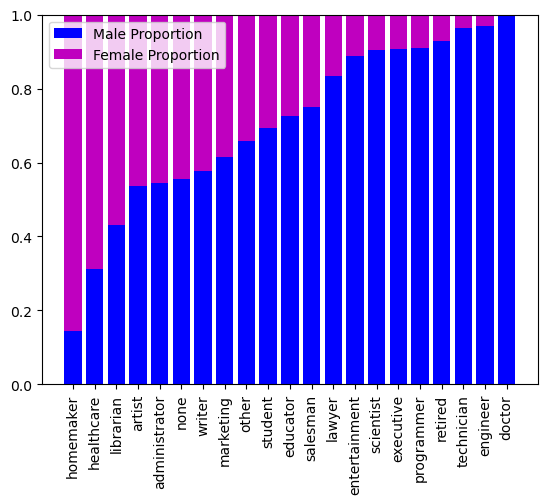

In [13]:
# Create a stacked barchart showing the results above

# alternative pandas command: counts.plot.bar(stacked = True, )
counts.index
plt.bar(counts.index, counts['M_Prop'], color='b')
plt.bar(counts.index, counts['F_Prop'], bottom=counts['M_Prop'], color='m')
plt.xticks(rotation = 90)
plt.legend(["Male Proportion", "Female Proportion"])
plt.show()

In [14]:
# Extract the first digit of each zip code 
# and create a new column called 'region' that maps the
# first digit of the zip to new values using this dictionary:
d = {'0': 'New England',
'1': 'Mid-Atlantic',
'2': 'Central East Coast',
'3': 'The South',
'4': 'Midwest',
'5': 'Northern Great Plains',
'6': 'Central Great Plains',
'7': 'Southern Central',
'8': 'Mountain Desert',
'9': 'West Coast'} 

regional_users = users.copy()
regional_users['region'] = regional_users['zip_code'].str[0].map(d)

In [15]:
# print the first 5 rows of the result
# postal codes that begin with a letter are actually Canadian but are missing the last digit. These rows can be ignored.

print(regional_users.head())

         age gender  occupation zip_code           region
user_id                                                  
1         24      M  technician    85711  Mountain Desert
2         53      F       other    94043       West Coast
3         23      M      writer    32067        The South
4         24      M  technician    43537          Midwest
5         33      F       other    15213     Mid-Atlantic


In [16]:
# for the occupation 'retired', find the mean age of each region

print(regional_users[regional_users['occupation'] == "retired"].groupby('region')['age'].mean())

region
Central East Coast       60.0
Central Great Plains     59.5
Mid-Atlantic             60.0
Midwest                  69.0
New England              65.0
Northern Great Plains    61.0
The South                73.0
West Coast               60.5
Name: age, dtype: float64
